In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#경로 설정 
import os
os.chdir('/content/drive/MyDrive/A2W/데이터')

In [3]:
pip install pyproj

     |████████████████████████████████| 6.6MB 6.8MB/s 


In [4]:
pip install rtree

     |████████████████████████████████| 1.0MB 9.6MB/s 


In [5]:
pip install geopandas

     |████████████████████████████████| 1.0MB 5.7MB/s 
     |████████████████████████████████| 15.4MB 228kB/s 


In [6]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string

plt.rcParams['figure.figsize'] = [10, 10]
epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")

In [7]:
import matplotlib.font_manager as fm
import matplotlib 

# **행정동 데이터**

In [8]:
# 행정동 경계 파일 읽기
hangjung_gubun = gpd.GeoDataFrame.from_file("umd.shp", encoding = 'utf-8')
# hangjung_gubun.crs = epsg5179
hangjung_gubun

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847..."
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498..."
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383..."
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585..."
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813..."
...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116..."
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371..."
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563..."
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008..."


In [9]:
# 행정동 경계 파일 읽기
hangjung_gubun_si = pd.read_csv('umd_si.csv', encoding='utf-8')
# hangjung_gubun.crs = epsg5179
hangjung_gubun_si

,시
0,포항시 남구
1,포항시 남구
2,포항시 남구
3,포항시 남구
4,포항시 남구
...,...
632,합천군
633,합천군
634,합천군
635,합천군


In [10]:
hangjung_gubun["시"] = hangjung_gubun_si

In [11]:
hangjung_gubun

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구
...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군


# **산사태 데이터**

In [12]:
landslide_CNT = pd.read_csv('Landslide_CNT.csv', encoding='utf-8')
landslide_CNT

,date,sd,sgg,umd,sum_cnt,sum_hpa
0,20110709,경상남도,밀양시,내일동,1,1.20
1,20110709,경상남도,밀양시,단장면,4,3.70
2,20110709,경상남도,밀양시,무안면,5,4.20
3,20110709,경상남도,밀양시,부북면,6,7.80
4,20110709,경상남도,밀양시,산외면,1,2.00
...,...,...,...,...,...,...
354,20191003,경상북도,포항시 북구,장량동,1,0.02
355,20191003,경상북도,포항시 북구,중앙동,1,0.40
356,20191003,경상북도,포항시 북구,청하면,4,0.93
357,20191003,경상북도,포항시 북구,환여동,1,0.10


# **데이터 합치기**

In [ ]:
hangjung_gubun["umd2"] = 0

for j in range (637):
  hangjung_gubun["umd2"][j] = hangjung_gubun["ADM_DR_NM"][j][0:2]

hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,umd2
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",구룡
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",연일
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",오천
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",대송
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",동해
...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",쌍백
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",삼가
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",가회
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",대병


In [ ]:
landslide_CNT["umd2"] = 0

for j in range (359):
  landslide_CNT["umd2"][j] = landslide_CNT["umd"][j][0:2]

landslide_CNT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2
0,20110709,경상남도,밀양시,내일동,1,1.20,내일
1,20110709,경상남도,밀양시,단장면,4,3.70,단장
2,20110709,경상남도,밀양시,무안면,5,4.20,무안
3,20110709,경상남도,밀양시,부북면,6,7.80,부북
4,20110709,경상남도,밀양시,산외면,1,2.00,산외
...,...,...,...,...,...,...,...
354,20191003,경상북도,포항시 북구,장량동,1,0.02,장량
355,20191003,경상북도,포항시 북구,중앙동,1,0.40,중앙
356,20191003,경상북도,포항시 북구,청하면,4,0.93,청하
357,20191003,경상북도,포항시 북구,환여동,1,0.10,환여


In [ ]:
hangjung_gubun["sum_cnt"] = 0
landslide_CNT["check"] = 0

landslide_CNT["umd2"] = landslide_CNT["umd2"]

for i in range (637):
  for j in range (359):
    if landslide_CNT["umd2"][j] == hangjung_gubun["umd2"][i]:
      hangjung_gubun["sum_cnt"][i] += landslide_CNT["sum_cnt"][j]
      landslide_CNT["check"][j] += 1

hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,umd2,sum_cnt
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",구룡,0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",연일,2
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",오천,0
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",대송,1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",동해,1
...,...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",쌍백,3
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",삼가,1
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",가회,5
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",대병,2


In [ ]:
# 산사태 정보가 
landslide_CNT["check"].unique()

array([1, 2, 4, 3, 7])

In [ ]:
landslide_CNT['umd2'].value_counts()

대가    5
북면    5
산청    4
옥종    4
병곡    4
     ..
북상    1
수곡    1
우창    1
영양    1
상봉    1
Name: umd2, Length: 233, dtype: int64

In [ ]:
lc = landslide_CNT.sort_values(by=['check'], axis=0)

In [ ]:
hangjung_gubun["umd2"].value_counts()

중앙    7
점촌    5
휴천    4
서부    3
서면    3
     ..
대송    1
자양    1
상망    1
입암    1
신흥    1
Name: umd2, Length: 563, dtype: int64

In [ ]:
landslide_CNT.sort_values(by='check')

,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2,check
0,20110709,경상남도,밀양시,내일동,1,1.20,내일,1
237,20180703,경상남도,통영시,광도면,1,0.02,광도,1
236,20161005,경상북도,울릉군,울릉읍,1,1.00,울릉,1
235,20161005,경상북도,경주시,외동읍,2,2.70,외동,1
234,20161005,경상북도,경주시,양북면,4,1.18,양북,1
...,...,...,...,...,...,...,...,...
220,20161005,경상남도,김해시,장유2동,1,0.80,장유,3
137,20120917,경상남도,함양군,휴천면,5,5.69,휴천,4
76,20110808,경상남도,함양군,휴천면,2,2.18,휴천,4
249,20180826,경상남도,함양군,휴천면,1,0.33,휴천,4


In [ ]:
hangjung_gubun["landslide"] = 0

for i in range (637):
  if hangjung_gubun["sum_cnt"][i] > 0:
    hangjung_gubun["landslide"][i] = 1
hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,umd2,sum_cnt,landslide
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",구룡,0,0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",연일,2,1
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",오천,0,0
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",대송,1,1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",동해,1,1
...,...,...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",쌍백,3,1
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",삼가,1,1
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",가회,5,1
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",대병,2,1


Text(0.5, 1.0, 'Landslide from Gyeongsangdo')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


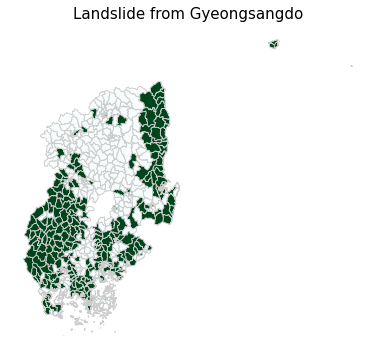

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'landslide'
# set the range for the choropleth
vmin, vmax = 0, 1
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

hangjung_gubun.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Landslide from Gyeongsangdo', fontdict={'fontsize': '15', 'fontweight' : '3'})
# create an annotation for the data source
# ax.annotate('Source: forest.go.kr ',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# # Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = fig.colorbar(sm)
#saving our map as .png file.
# fig.savefig(‘map_export.png’, dpi=300)

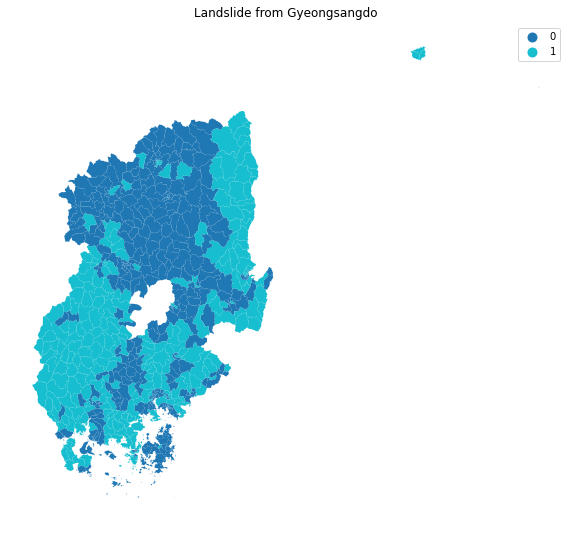

In [ ]:
# "sandybrown", 'frestgreen'
ax = hangjung_gubun.plot(column="landslide", legend=True, categorical=True)

ax.set_title("Landslide from Gyeongsangdo")
ax.set_axis_off()
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


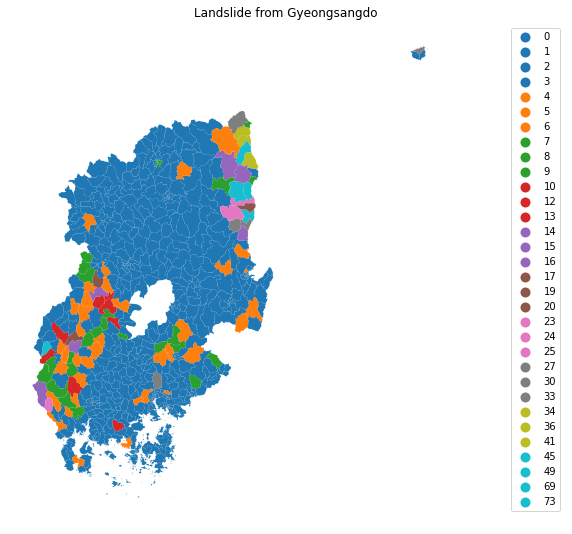

In [ ]:
ax = hangjung_gubun.plot(column="sum_cnt", legend=True, categorical=True)
ax.set_title("Landslide from Gyeongsangdo")
ax.set_axis_off()
plt.show()

# **데이터 합치기2**

In [ ]:
hangjung_gubun["sum_cnt"] = 0
landslide_CNT["check"] = 0


for i in range (637):
  for j in range (359):
    if landslide_CNT["umd"][j] == hangjung_gubun["ADM_DR_NM"][i]:
      hangjung_gubun["sum_cnt"][i] += landslide_CNT["sum_cnt"][j]
      landslide_CNT["check"][j] += 1

hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,sum_cnt
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",2
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",0
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",1
...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",3
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",1
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",5
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",2


In [ ]:
landslide_CNT["check"].unique()

array([1, 2, 3, 0, 7])

In [ ]:
hangjung_gubun["ADM_DR_NM"].value_counts()

중앙동     7
서면      3
북면      3
덕곡면     2
성산면     2
       ..
오동동     1
죽장면     1
휴천3동    1
도량동     1
서후면     1
Name: ADM_DR_NM, Length: 607, dtype: int64

In [ ]:
landslide_CNT["check"].value_counts()

1    330
2     19
3      6
0      3
7      1
Name: check, dtype: int64

In [ ]:
landslide_CNT.sort_values(by='check')

,date,sd,sgg,umd,sum_cnt,sum_hpa,check
0,20110709,경상남도,밀양시,내일동,1,1.20,1
239,20180826,경상남도,함양군,마천면,1,0.40,1
238,20180703,경상북도,영양군,석보면,1,0.62,1
237,20180703,경상남도,통영시,광도면,1,0.02,1
236,20161005,경상북도,울릉군,울릉읍,1,1.00,1
...,...,...,...,...,...,...,...
280,20191003,경상남도,창원시 의창구,북면,1,0.09,3
333,20191003,경상북도,울릉군,북면,2,0.65,3
95,20120917,경상남도,남해군,서면,1,1.00,3
338,20191003,경상북도,울진군,북면,25,2.96,3


In [ ]:
# 적용 안 된 남면, 묘산면, 수비면 적용
# landslide_CNT.loc[[223, 286, 328]] 
hangjung_gubun.loc[[251, 54, 622], ["sum_cnt"]] = 1

In [ ]:
# 포항 북구 중앙동 제외 다른 중앙동 제거
hangjung_gubun.loc[[156, 206, 357, 370, 455, 466], ["sum_cnt"]] = 0

In [ ]:
# 남해군 서면 제외 다른 서면 제거
hangjung_gubun.loc[[37, 330], ["sum_cnt"]] = 0

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


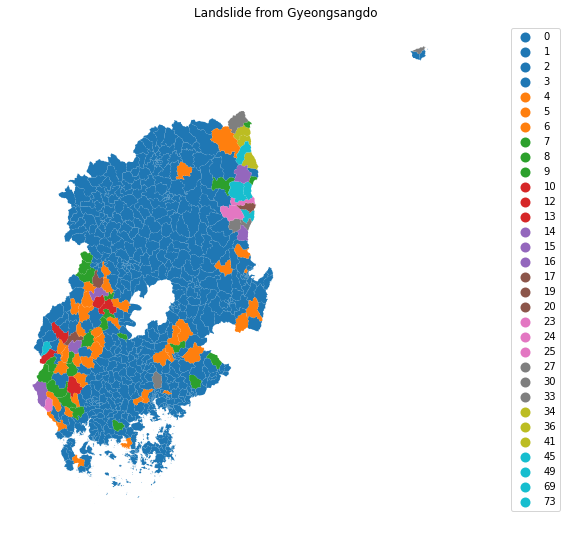

In [ ]:
ax = hangjung_gubun.plot(column="sum_cnt", legend=True, categorical=True)
ax.set_title("Landslide from Gyeongsangdo")
ax.set_axis_off()
plt.show()

In [ ]:
lc.to_csv("lc.csv")

In [ ]:
result_soil_gyeongnam_point_csv = result_soil_gyeongnam_point.drop(["geometry"], axis=1)
result_soil_gyeongnam_point_csv.to_csv("result_soil_gyeongnam_point.csv")

# **데이터 합치기3**

In [13]:
hangjung_gubun["umd2"] = hangjung_gubun["시"] + " " + hangjung_gubun["ADM_DR_NM"]
hangjung_gubun

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면
...,...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면


In [14]:
landslide_CNT["umd2"] = landslide_CNT["sgg"] + " " + landslide_CNT["umd"]
landslide_CNT

,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2
0,20110709,경상남도,밀양시,내일동,1,1.20,밀양시 내일동
1,20110709,경상남도,밀양시,단장면,4,3.70,밀양시 단장면
2,20110709,경상남도,밀양시,무안면,5,4.20,밀양시 무안면
3,20110709,경상남도,밀양시,부북면,6,7.80,밀양시 부북면
4,20110709,경상남도,밀양시,산외면,1,2.00,밀양시 산외면
...,...,...,...,...,...,...,...
354,20191003,경상북도,포항시 북구,장량동,1,0.02,포항시 북구 장량동
355,20191003,경상북도,포항시 북구,중앙동,1,0.40,포항시 북구 중앙동
356,20191003,경상북도,포항시 북구,청하면,4,0.93,포항시 북구 청하면
357,20191003,경상북도,포항시 북구,환여동,1,0.10,포항시 북구 환여동


In [15]:
hangjung_gubun["sum_cnt"] = 0
landslide_CNT["check"] = 0


for i in range (637):
  for j in range (359):
    if landslide_CNT["umd2"][j] == hangjung_gubun["umd2"][i]:
      hangjung_gubun["sum_cnt"][i] += landslide_CNT["sum_cnt"][j]
      landslide_CNT["check"][j] += 1

hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0
...,...,...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면,3
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면,1
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면,5
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면,2


In [16]:
landslide_CNT["check"].unique()

array([1, 0])

In [16]:
# 적용안된 남면 묘산면 수비면 확인
hangjung_gubun.loc[[568, 622, 250]]

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt
568,20200630,3835035,남면,"MULTIPOLYGON (((1036122.467 1636715.650, 10361...",남해군,남해군 남면,1
622,20200630,3840032,묘산면,"POLYGON ((1056763.385 1745019.947, 1056773.037...",합천군,합천군 묘산면,6
250,20200630,3734033,일월면,"POLYGON ((1148379.821 1872726.154, 1148420.657...",영양군,영양군 일월면,1


In [17]:
landslide_CNT.sort_values(by='check')

,date,sd,sgg,umd,sum_cnt,sum_hpa,umd2,check
223,20161005,경상남도,남해군,남면,1,0.04,남해군 남면,0
286,20191003,경상남도,합천군,묘산면,1,0.75,합천군 묘산면,0
328,20191003,경상북도,영양군,수비면,15,4.21,영양군 수비면,0
242,20180826,경상남도,함양군,서상면,1,0.20,함양군 서상면,1
241,20180826,경상남도,함양군,병곡면,5,6.40,함양군 병곡면,1
...,...,...,...,...,...,...,...,...
115,20120917,경상남도,양산시,하북면,4,1.51,양산시 하북면,1
114,20120917,경상남도,양산시,원동면,1,0.30,양산시 원동면,1
113,20120917,경상남도,양산시,서창동,1,0.18,양산시 서창동,1
133,20120917,경상남도,함양군,안의면,12,60.90,함양군 안의면,1


In [18]:
hangjung_gubun["landslide"] = 0

for i in range (637):
  if hangjung_gubun["sum_cnt"][i] > 0:
    hangjung_gubun["landslide"][i] = 1
hangjung_gubun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt,landslide
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0,0
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2,1
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585...",포항시 남구,포항시 남구 대송면,1,1
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813...",포항시 남구,포항시 남구 동해면,0,0
...,...,...,...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면,3,1
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면,1,1
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면,5,1
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면,2,1


In [55]:
hangjung_gubun['landslide'].value_counts()

0    397
1    240
Name: landslide, dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


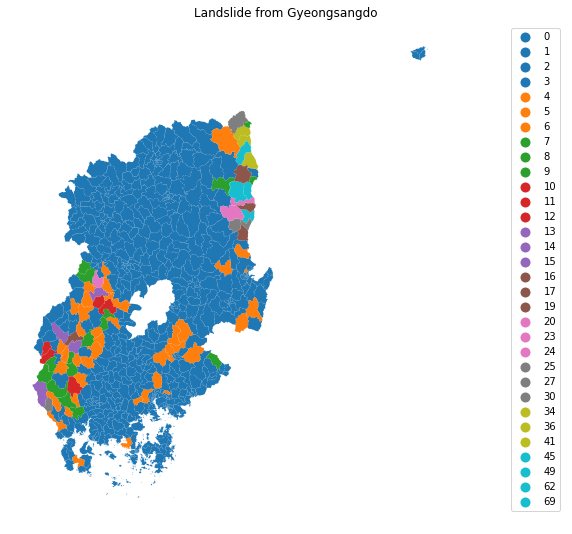

In [ ]:
ax = hangjung_gubun.plot(column="sum_cnt", legend=True, categorical=True)
ax.set_title("Landslide from Gyeongsangdo")
ax.set_axis_off()
plt.show()

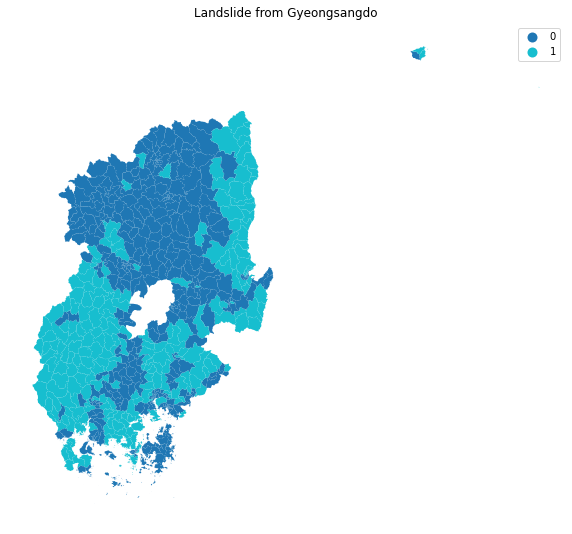

In [ ]:
# "sandybrown", 'frestgreen'
ax = hangjung_gubun.plot(column="landslide", legend=True, categorical=True)

ax.set_title("Landslide from Gyeongsangdo")
ax.set_axis_off()
plt.show()

Text(0.5, 1.0, 'Landslide from Gyeongsangdo')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


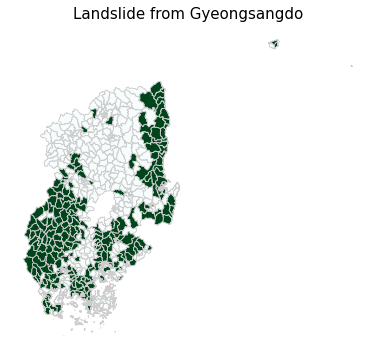

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'landslide'
# set the range for the choropleth
vmin, vmax = 0, 1
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

hangjung_gubun.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Landslide from Gyeongsangdo', fontdict={'fontsize': '15', 'fontweight' : '3'})
# create an annotation for the data source

# **토양도**

In [19]:
# 경상북도 토양도1 파일 읽기
soil_gyeongbuk1 = gpd.GeoDataFrame.from_file("soil_gyeongbuk1.shp", encoding = 'utf-8')
soil_gyeongbuk1

,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,1,280272.57,266104.66,1,11,799.2,21.8,164.8,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1035111.750 1766151.771, 1035110.136..."
1,2,283750.14,265050.01,1,11,534.8,15.7,301.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1038301.281 1765131.640, 1038316.530..."
2,3,281027,265427,1,11,663.0,21.7,156.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1035935.188 1765721.998, 1035935.784..."
3,4,279833.45,267538.73,1,11,850.3,9.8,129.4,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1034633.940 1767271.065, 1034623.644..."
4,5,280102.57,266674.66,1,11,832.9,18.9,55.8,2,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1034709.542 1766460.149, 1034712.390..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221279,221280,346202.03125,396564.9375,3,31,597.0,35.6,288.8,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1101889.274 1896175.221, 1101892.028..."
221280,221281,349057.71875,396495.78125,3,31,905.9,33.1,312.2,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1104811.798 1895928.004, 1104814.922..."
221281,221282,346512.03125,396794.9375,3,31,728.3,29.4,303.0,1,3,2,2,2,2,02,L102,b'B\xa9\xfc',"POLYGON ((1102175.089 1896287.757, 1102178.071..."
221282,221283,346507.03125,397274.9375,3,31,768.2,33.7,287.9,1,3,2,3,2,2,02,L102,b'B\xa9\xfc',"MULTIPOLYGON (((1102311.492 1896747.225, 11023..."


In [20]:
# 경상북도 토양도1 파일 읽기
soil_gyeongbuk2 = gpd.GeoDataFrame.from_file("soil_gyeongbuk2.shp", encoding = 'utf-8')
soil_gyeongbuk2

,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,221285,321827.61,248439.61,2,22,240.0,0.0,-1.0,3,12,01,1,10,03,13,L313,b'DRb\xa9\xfb',"POLYGON ((1077024.102 1747919.176, 1077029.655..."
1,221286,322381.95,248422.71,2,22,91.2,16.9,67.4,3,12,05,2,20,03,14,L314,b'DRb\xa9\xfc',"POLYGON ((1077249.239 1747943.453, 1077249.218..."
2,221287,323040,248901,2,24,274.6,10.8,96.5,3,12,01,1,20,02,01,L101,b'B\xa9\xfb',"POLYGON ((1077576.669 1747955.809, 1077573.392..."
3,221288,323178.49,248552.08,2,24,149.0,27.3,300.1,3,12,05,3,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1077728.510 1747969.313, 1077724.133..."
4,221289,323231.7,248407.78,2,24,174.3,32.3,229.1,3,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1078028.473 1747943.514, 1078032.681..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128088,349373,414894.09,392483.24,3,31,55.6,7.0,188.3,4,07,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1170307.915 1891782.550, 1170310.789..."
128089,349374,414919.89,392903.28,3,31,48.3,25.3,359.7,4,07,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1170256.727 1892170.624, 1170261.351..."
128090,349375,414933.61,392778.4,3,31,72.4,19.1,96.3,4,07,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1170277.283 1891920.324, 1170283.163..."
128091,349376,414977.64,391941.33,3,31,42.2,13.4,192.8,4,07,05,1,10,02,27,L727,Im,"POLYGON ((1170514.324 1891491.392, 1170519.793..."


In [21]:
# 경남 토양도 파일 읽기
soil_gyeongnam = gpd.GeoDataFrame.from_file("soil_gyeongnam.shp", encoding = 'utf-8')
soil_gyeongnam

,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL,geometry
0,1,272532.09,224400.12,3,31,138.8,27.1,26.6,2,12,05,2,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1027205.103 1724255.439, 1027214.829..."
1,2,272345.16,224387.78,3,31,159.2,33.2,357.8,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1026978.790 1724211.973, 1026976.591..."
2,3,272250.76,224336.55,3,31,173.0,18.0,345.6,2,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1026887.967 1724103.048, 1026886.119..."
3,4,271989.83,224347.75,3,31,143.3,42.8,313.4,2,12,05,2,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1026620.495 1724179.025, 1026613.575..."
4,5,272573.94,224291.26,3,31,150.2,22.7,4.2,2,12,05,2,20,01,02,L102,b'B\xa9\xfc',"POLYGON ((1027261.058 1724181.369, 1027270.027..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224753,224754,337166.92,237231.29,1,14,112.4,32.8,152.7,3,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1091953.499 1737047.823, 1091958.656..."
224754,224755,337632.81,236892.69,2,25,277.9,25.4,209.0,3,12,01,1,10,02,01,L101,b'B\xa9\xfb',"POLYGON ((1092290.081 1737061.135, 1092293.391..."
224755,224756,337931.09,237395.44,2,25,147.3,24.3,89.2,3,12,05,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1092589.569 1737023.026, 1092557.644..."
224756,224757,337963.99,237046.15,2,25,263.3,30.6,23.5,3,12,03,2,20,02,02,L102,b'B\xa9\xfc',"POLYGON ((1092258.418 1737153.111, 1092260.266..."


# **토양도 시각화**

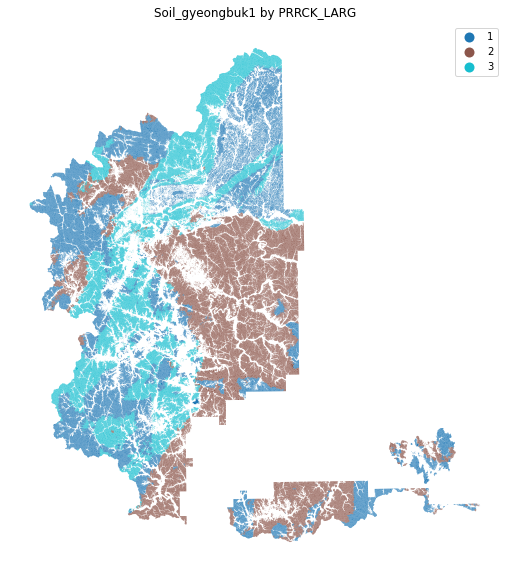

In [ ]:
ax = soil_gyeongbuk1.plot(column="PRRCK_LARG", legend=True, categorical=True)
ax.set_title("Soil_gyeongbuk1 by PRRCK_LARG")
ax.set_axis_off()
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


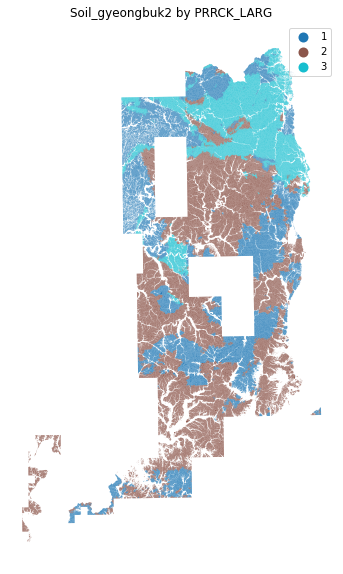

In [ ]:
ax = soil_gyeongbuk2.plot(column="PRRCK_LARG", legend=True, categorical=True)
ax.set_title("Soil_gyeongbuk2 by PRRCK_LARG")
ax.set_axis_off()
plt.show()

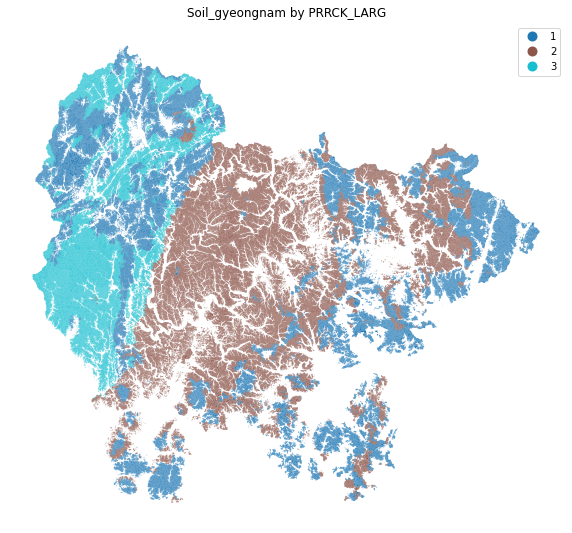

In [ ]:
ax = soil_gyeongnam.plot(column="PRRCK_LARG", legend=True, categorical=True)
ax.set_title("Soil_gyeongnam by PRRCK_LARG")
ax.set_axis_off()
plt.show()

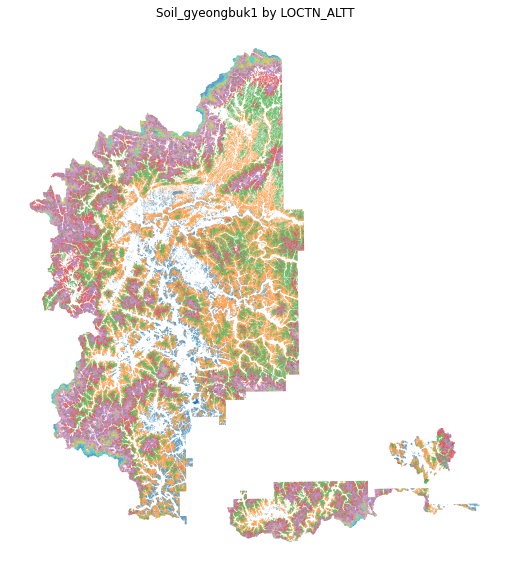

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
ax = soil_gyeongbuk1.plot(column="LOCTN_ALTT", categorical=True)
ax.set_title("Soil_gyeongbuk1 by LOCTN_ALTT")
ax.set_axis_off()
plt.show()

# **토양도 + 행정동 + 산사태**

In [22]:
result_h_s = gpd.sjoin(hangjung_gubun, soil_gyeongbuk1, how='left', op='intersects')
result_h_s

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt,landslide,index_right,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847...",포항시 남구,포항시 남구 구룡포읍,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498...",포항시 남구,포항시 남구 연일읍,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,102520.0,102521,411209.93,268307.46,1,12,418.0,38.4,137.7,3,12,01,1,10,02,01,L101,b'B\xa9\xfb'
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,97363.0,97364,411406.41,268309.99,1,12,390.6,25.9,147.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb'
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,99677.0,99678,411985.43,267962.18,1,12,453.6,19.1,358.8,3,12,06,3,20,02,02,L102,b'B\xa9\xfc'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116...",합천군,합천군 쌍백면,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371...",합천군,합천군 삼가면,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563...",합천군,합천군 가회면,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008...",합천군,합천군 대병면,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
result_h_s.dropna(subset=["OBJ_ID"])

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry,시,umd2,sum_cnt,landslide,index_right,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,LDMARK_STN,MAP_LABEL
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,102520.0,102521,411209.93,268307.46,1,12,418.0,38.4,137.7,3,12,01,1,10,02,01,L101,b'B\xa9\xfb'
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,97363.0,97364,411406.41,268309.99,1,12,390.6,25.9,147.5,3,12,01,1,10,02,01,L101,b'B\xa9\xfb'
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,99677.0,99678,411985.43,267962.18,1,12,453.6,19.1,358.8,3,12,06,3,20,02,02,L102,b'B\xa9\xfc'
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,99684.0,99685,411981.41,268229.99,1,12,425.5,27.8,228.1,3,12,01,1,10,01,01,L101,b'B\xa9\xfb'
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383...",포항시 남구,포항시 남구 오천읍,0,0,99659.0,99660,412302.19,267788.4,1,12,479.2,9.0,70.0,3,12,01,1,10,01,01,L101,b'B\xa9\xfb'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,20200630,3840038,덕곡면,"POLYGON ((1072628.628 1740166.117, 1072647.091...",합천군,합천군 덕곡면,0,0,6115.0,6116,319546.59,240069.75,2,24,279.9,24.6,54.2,3,12,01,1,20,02,01,L101,b'B\xa9\xfb'
628,20200630,3840038,덕곡면,"POLYGON ((1072628.628 1740166.117, 1072647.091...",합천군,합천군 덕곡면,0,0,10979.0,10980,319612.2,239611.34,2,24,286.9,27.1,257.8,3,12,01,1,20,02,01,L101,b'B\xa9\xfb'
628,20200630,3840038,덕곡면,"POLYGON ((1072628.628 1740166.117, 1072647.091...",합천군,합천군 덕곡면,0,0,11349.0,11350,320151.96,239744.77,2,24,285.4,37.5,303.5,3,12,05,3,20,02,02,L102,b'B\xa9\xfc'
628,20200630,3840038,덕곡면,"POLYGON ((1072628.628 1740166.117, 1072647.091...",합천군,합천군 덕곡면,0,0,11643.0,11644,319546.59,240069.75,2,24,279.9,24.6,54.2,3,12,01,1,20,02,01,L101,b'B\xa9\xfb'


In [24]:
result_h_s['landslide'].value_counts()

0    182959
1     54229
Name: landslide, dtype: int64

In [25]:
result_h_s_drop = result_h_s.drop(['index_right','BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry', '시', 'umd2', 'sum_cnt', 'LDMARK_STN', 'MAP_LABEL'], axis=1)
result_h_s_drop

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,102521,411209.93,268307.46,1,12,418.0,38.4,137.7,3,12,01,1,10,02,01
2,0,97364,411406.41,268309.99,1,12,390.6,25.9,147.5,3,12,01,1,10,02,01
2,0,99678,411985.43,267962.18,1,12,453.6,19.1,358.8,3,12,06,3,20,02,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
result_h_s_drop_dn = result_h_s_drop.dropna(subset=["OBJ_ID"])
result_h_s_drop_dn

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
2,0,102521,411209.93,268307.46,1,12,418.0,38.4,137.7,3,12,01,1,10,02,01
2,0,97364,411406.41,268309.99,1,12,390.6,25.9,147.5,3,12,01,1,10,02,01
2,0,99678,411985.43,267962.18,1,12,453.6,19.1,358.8,3,12,06,3,20,02,02
2,0,99685,411981.41,268229.99,1,12,425.5,27.8,228.1,3,12,01,1,10,01,01
2,0,99660,412302.19,267788.4,1,12,479.2,9.0,70.0,3,12,01,1,10,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0,6116,319546.59,240069.75,2,24,279.9,24.6,54.2,3,12,01,1,20,02,01
628,0,10980,319612.2,239611.34,2,24,286.9,27.1,257.8,3,12,01,1,20,02,01
628,0,11350,320151.96,239744.77,2,24,285.4,37.5,303.5,3,12,05,3,20,02,02
628,0,11644,319546.59,240069.75,2,24,279.9,24.6,54.2,3,12,01,1,20,02,01


In [27]:
result_h_s.corr(method='pearson')

,sum_cnt,landslide,index_right,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL
sum_cnt,1.000000,0.665847,-0.413778,0.120678,0.119061,-0.015459
landslide,0.665847,1.000000,-0.476102,0.078141,0.088913,-0.023210
index_right,-0.413778,-0.476102,1.000000,0.069964,-0.017262,0.017133
LOCTN_ALTT,0.120678,0.078141,0.069964,1.000000,0.434658,-0.001453
LOCTN_GRDN,0.119061,0.088913,-0.017262,0.434658,1.000000,0.032974
EIGHT_AGL,-0.015459,-0.023210,0.017133,-0.001453,0.032974,1.000000


In [28]:
result_h_s_drop_dn.corr(method='pearson')

,landslide,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL
landslide,1.000000,0.078141,0.088913,-0.023210
LOCTN_ALTT,0.078141,1.000000,0.434658,-0.001453
LOCTN_GRDN,0.088913,0.434658,1.000000,0.032974
EIGHT_AGL,-0.023210,-0.001453,0.032974,1.000000


In [29]:
result_h_s_drop_dn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 236789 entries, 2 to 628
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   landslide   236789 non-null  int64  
 1   OBJ_ID      236789 non-null  object 
 2   ARA_XCRD    236789 non-null  object 
 3   ARA_YCRD    236789 non-null  object 
 4   PRRCK_LARG  236789 non-null  object 
 5   PRRCK_MDDL  236789 non-null  object 
 6   LOCTN_ALTT  236789 non-null  float64
 7   LOCTN_GRDN  236789 non-null  float64
 8   EIGHT_AGL   236789 non-null  float64
 9   CLZN_CD     236789 non-null  object 
 10  TPGRP_TPCD  164860 non-null  object 
 11  PRDN_FOM_C  164860 non-null  object 
 12  SLANT_TYP   164860 non-null  object 
 13  SLDPT_TPCD  162069 non-null  object 
 14  SCSTX_CD    162069 non-null  object 
 15  SLTP_CD     236789 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 30.7+ MB


In [30]:
result_h_s_drop_dn_f = result_h_s_drop_dn.astype('float')
result_h_s_drop_dn_f

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
2,0.0,102521.0,411209.93,268307.46,1.0,12.0,418.0,38.4,137.7,3.0,12.0,1.0,1.0,10.0,2.0,1.0
2,0.0,97364.0,411406.41,268309.99,1.0,12.0,390.6,25.9,147.5,3.0,12.0,1.0,1.0,10.0,2.0,1.0
2,0.0,99678.0,411985.43,267962.18,1.0,12.0,453.6,19.1,358.8,3.0,12.0,6.0,3.0,20.0,2.0,2.0
2,0.0,99685.0,411981.41,268229.99,1.0,12.0,425.5,27.8,228.1,3.0,12.0,1.0,1.0,10.0,1.0,1.0
2,0.0,99660.0,412302.19,267788.40,1.0,12.0,479.2,9.0,70.0,3.0,12.0,1.0,1.0,10.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.0,6116.0,319546.59,240069.75,2.0,24.0,279.9,24.6,54.2,3.0,12.0,1.0,1.0,20.0,2.0,1.0
628,0.0,10980.0,319612.20,239611.34,2.0,24.0,286.9,27.1,257.8,3.0,12.0,1.0,1.0,20.0,2.0,1.0
628,0.0,11350.0,320151.96,239744.77,2.0,24.0,285.4,37.5,303.5,3.0,12.0,5.0,3.0,20.0,2.0,2.0
628,0.0,11644.0,319546.59,240069.75,2.0,24.0,279.9,24.6,54.2,3.0,12.0,1.0,1.0,20.0,2.0,1.0


In [31]:
result_h_s_drop_dn_f.corr()

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
landslide,1.000000,-0.476102,-0.113043,-0.519143,0.061486,0.063841,0.078141,0.088913,-0.023210,0.386224,0.304416,0.084317,0.037630,0.295717,-0.030465,-0.076289
OBJ_ID,-0.476102,1.000000,0.271147,0.835560,-0.109429,-0.144026,0.069964,-0.017262,0.017133,-0.492396,-0.610097,-0.209849,-0.008072,-0.576725,-0.058933,0.048670
ARA_XCRD,-0.113043,0.271147,1.000000,-0.105914,-0.105312,-0.056025,-0.140524,-0.047684,0.006574,0.288106,0.027631,-0.007727,0.000832,-0.004568,0.152891,0.055885
ARA_YCRD,-0.519143,0.835560,-0.105914,1.000000,-0.093548,-0.169044,0.065414,-0.053561,0.022078,-0.698885,-0.738506,-0.237722,-0.019685,-0.682604,-0.152487,0.043553
PRRCK_LARG,0.061486,-0.109429,-0.105312,-0.093548,1.000000,0.982456,-0.054018,-0.000672,-0.013527,0.054777,0.139818,0.061573,0.003451,0.139409,0.064327,-0.031792
PRRCK_MDDL,0.063841,-0.144026,-0.056025,-0.169044,0.982456,1.000000,-0.068977,0.005358,-0.013806,0.110639,0.215542,0.085185,0.001858,0.200625,0.105907,-0.029892
LOCTN_ALTT,0.078141,0.069964,-0.140524,0.065414,-0.054018,-0.068977,1.000000,0.434658,-0.001453,-0.159812,0.013468,-0.317785,-0.064940,-0.146137,0.012331,-0.180949
LOCTN_GRDN,0.088913,-0.017262,-0.047684,-0.053561,-0.000672,0.005358,0.434658,1.000000,0.032974,0.000380,0.114504,-0.049632,0.064259,0.037646,0.070015,-0.344158
EIGHT_AGL,-0.023210,0.017133,0.006574,0.022078,-0.013527,-0.013806,-0.001453,0.032974,1.000000,-0.017162,-0.019809,-0.002889,0.002560,-0.016350,-0.002680,-0.035554
CLZN_CD,0.386224,-0.492396,0.288106,-0.698885,0.054777,0.110639,-0.159812,0.000380,-0.017162,1.000000,0.361244,0.122395,0.026484,0.350444,0.071180,-0.010104


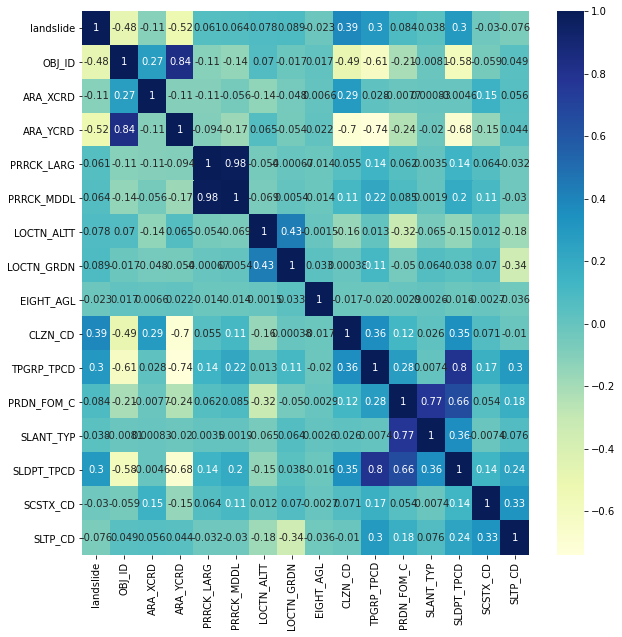

In [32]:
plt.figure(figsize = (10, 10))
corr_mat = result_h_s_drop_dn_f.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap='YlGnBu')

In [34]:
landslide_corr = [-0.476102,	-0.113043,	-0.519143,	0.061486,	0.063841,	0.078141,	0.088913,	-0.023210,	0.386224,	0.304416,	0.084317,	0.037630,	0.295717,	-0.030465,	-0.076289]
landslide_corr_mean = sum(landslide_corr)/len(landslide_corr)
print(sum(landslide_corr)/len(landslide_corr))

0.01082886666666668


In [35]:
for i in landslide_corr:
  if i >= landslide_corr_mean:
    print(i)

0.061486
0.063841
0.078141
0.088913
0.386224
0.304416
0.084317
0.03763
0.295717


PRRCK_LARG, PRRCK_MDDL, LOCTN_ALTT, LOCTN_GRDN, CLZN_CD, TPGRP_TPCD, PRDN_FOM_C, SLANT_TYP, SLDPT_TPCD

pearson 상관관계

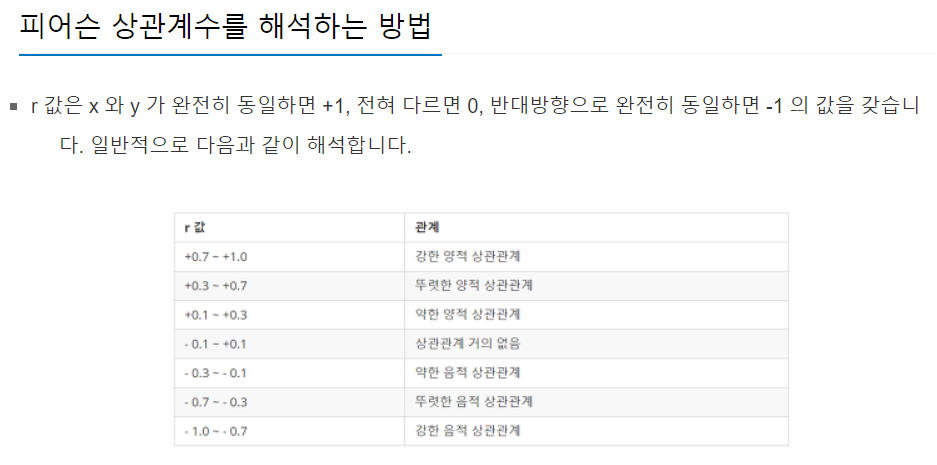

In [56]:
result_h_s_drop_dn_f.corr(method='pearson')

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
landslide,1.000000,-0.476102,-0.113043,-0.519143,0.061486,0.063841,0.078141,0.088913,-0.023210,0.386224,0.304416,0.084317,0.037630,0.295717,-0.030465,-0.076289
OBJ_ID,-0.476102,1.000000,0.271147,0.835560,-0.109429,-0.144026,0.069964,-0.017262,0.017133,-0.492396,-0.610097,-0.209849,-0.008072,-0.576725,-0.058933,0.048670
ARA_XCRD,-0.113043,0.271147,1.000000,-0.105914,-0.105312,-0.056025,-0.140524,-0.047684,0.006574,0.288106,0.027631,-0.007727,0.000832,-0.004568,0.152891,0.055885
ARA_YCRD,-0.519143,0.835560,-0.105914,1.000000,-0.093548,-0.169044,0.065414,-0.053561,0.022078,-0.698885,-0.738506,-0.237722,-0.019685,-0.682604,-0.152487,0.043553
PRRCK_LARG,0.061486,-0.109429,-0.105312,-0.093548,1.000000,0.982456,-0.054018,-0.000672,-0.013527,0.054777,0.139818,0.061573,0.003451,0.139409,0.064327,-0.031792
PRRCK_MDDL,0.063841,-0.144026,-0.056025,-0.169044,0.982456,1.000000,-0.068977,0.005358,-0.013806,0.110639,0.215542,0.085185,0.001858,0.200625,0.105907,-0.029892
LOCTN_ALTT,0.078141,0.069964,-0.140524,0.065414,-0.054018,-0.068977,1.000000,0.434658,-0.001453,-0.159812,0.013468,-0.317785,-0.064940,-0.146137,0.012331,-0.180949
LOCTN_GRDN,0.088913,-0.017262,-0.047684,-0.053561,-0.000672,0.005358,0.434658,1.000000,0.032974,0.000380,0.114504,-0.049632,0.064259,0.037646,0.070015,-0.344158
EIGHT_AGL,-0.023210,0.017133,0.006574,0.022078,-0.013527,-0.013806,-0.001453,0.032974,1.000000,-0.017162,-0.019809,-0.002889,0.002560,-0.016350,-0.002680,-0.035554
CLZN_CD,0.386224,-0.492396,0.288106,-0.698885,0.054777,0.110639,-0.159812,0.000380,-0.017162,1.000000,0.361244,0.122395,0.026484,0.350444,0.071180,-0.010104


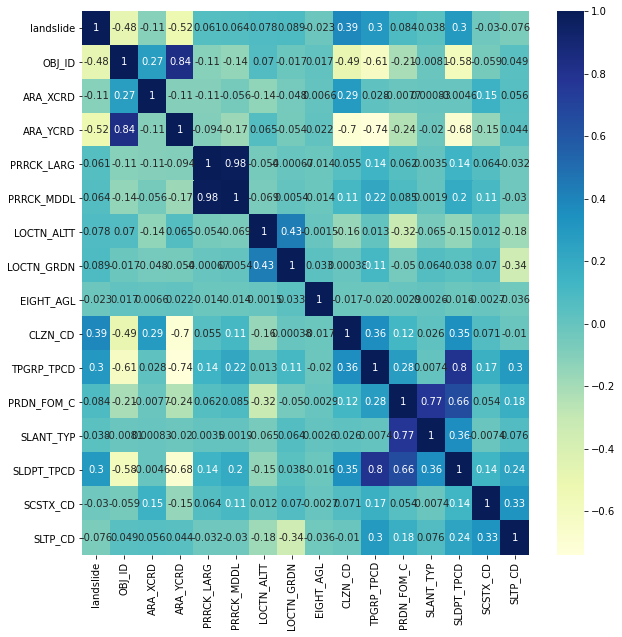

In [57]:
plt.figure(figsize = (10, 10))
corr_mat = result_h_s_drop_dn_f.corr(method='pearson')
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap='YlGnBu')

In [38]:
landslide_corr = [-0.476102,	-0.113043,	-0.519143,	0.061486,	0.063841,	0.078141,	0.088913,	-0.023210,	0.386224,	0.304416,	0.084317,	0.037630,	0.295717,	-0.030465,	-0.076289]

In [39]:
for i in landslide_corr:
  if i >= 0.1 or i <= -0.1:
    print(i)

-0.476102
-0.113043
-0.519143
0.386224
0.304416
0.295717


OBJ_ID, ARA_XCRD, ARA_YCRD, CLZN_CD, TPGRP_TPCD, SLDPT_TPCD

# 경북2로 상관관계 확인

In [34]:
result_h_s1 = gpd.sjoin(hangjung_gubun, soil_gyeongbuk2, how='left', op='intersects')

result_h_s_drop1 = result_h_s1.drop(['index_right','BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry', '시', 'umd2', 'sum_cnt', 'LDMARK_STN', 'MAP_LABEL'], axis=1)

result_h_s_drop_dn1 = result_h_s_drop1.dropna(subset=["OBJ_ID"])

result_h_s_drop_dn_f1 = result_h_s_drop_dn1.astype('float')

result_h_s_drop_dn_f1.corr()

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
landslide,1.000000,0.286337,0.743801,0.166861,0.203104,0.197146,-0.160147,0.066758,-0.025890,0.314903,0.148709,-0.064469,0.002160,-0.007597,0.097463,-0.111973
OBJ_ID,0.286337,1.000000,0.399607,0.936943,0.251371,0.138236,0.358662,0.192852,0.010448,-0.211618,0.099808,-0.115349,0.043641,0.187130,-0.230962,-0.175744
ARA_XCRD,0.743801,0.399607,1.000000,0.241701,0.275614,0.266109,-0.109024,0.092104,-0.016567,0.312193,0.236817,-0.091102,-0.003359,-0.005011,0.120422,-0.149053
ARA_YCRD,0.166861,0.936943,0.241701,1.000000,0.149802,0.025643,0.397645,0.178311,0.012874,-0.316349,0.036180,-0.087469,0.041761,0.188635,-0.270021,-0.143454
PRRCK_LARG,0.203104,0.251371,0.275614,0.149802,1.000000,0.976380,0.038052,0.093969,0.000557,0.093127,0.216033,-0.100079,0.034741,0.099725,0.071130,-0.085668
PRRCK_MDDL,0.197146,0.138236,0.266109,0.025643,0.976380,1.000000,-0.006707,0.079403,-0.002453,0.120408,0.235864,-0.094371,0.023027,0.065242,0.144440,-0.061167
LOCTN_ALTT,-0.160147,0.358662,-0.109024,0.397645,0.038052,-0.006707,1.000000,0.295134,0.028423,-0.623663,0.361265,-0.291401,0.007766,0.136854,-0.080126,-0.179116
LOCTN_GRDN,0.066758,0.192852,0.092104,0.178311,0.093969,0.079403,0.295134,1.000000,0.024374,-0.209027,0.269978,0.000274,0.132307,0.167118,0.016196,-0.369580
EIGHT_AGL,-0.025890,0.010448,-0.016567,0.012874,0.000557,-0.002453,0.028423,0.024374,1.000000,-0.026898,-0.011576,0.010447,0.017684,0.018977,-0.009112,-0.030486
CLZN_CD,0.314903,-0.211618,0.312193,-0.316349,0.093127,0.120408,-0.623663,-0.209027,-0.026898,1.000000,-0.240302,0.090163,-0.051037,-0.131366,0.050795,0.051789


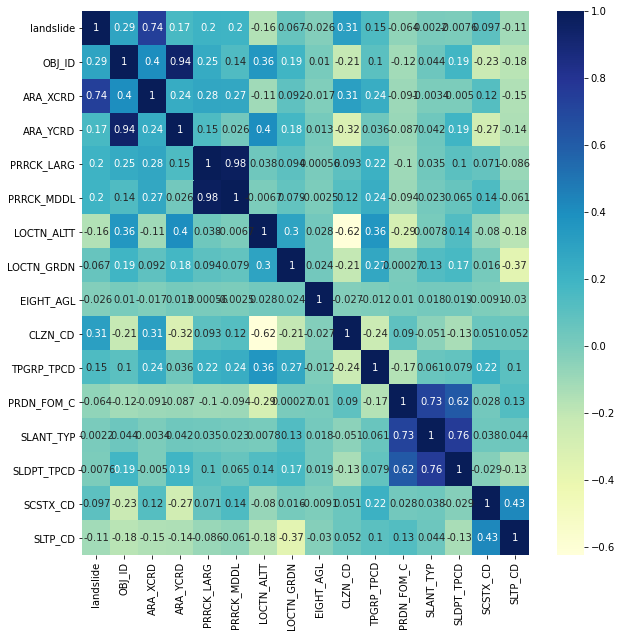

In [41]:
plt.figure(figsize = (10, 10))
corr_mat = result_h_s_drop_dn_f1.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap='YlGnBu')

In [42]:
landslide_corr1 = [0.286337,	0.743801,	0.166861,	0.203104,	0.197146,	-0.160147,	0.066758,	-0.025890,	0.314903,	0.148709,	-0.064469,	0.002160,	-0.007597,	0.097463,	-0.111973]
landslide_corr_mean1 = sum(landslide_corr1)/len(landslide_corr1)
print(sum(landslide_corr1)/len(landslide_corr1))

0.12381106666666666


In [43]:
for i in landslide_corr1:
  if i >= landslide_corr_mean1:
    print(i)

0.286337
0.743801
0.166861
0.203104
0.197146
0.314903
0.148709


In [44]:
result_h_s_drop_dn_f1.corr(method='pearson')

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
landslide,1.000000,0.286337,0.743801,0.166861,0.203104,0.197146,-0.160147,0.066758,-0.025890,0.314903,0.148709,-0.064469,0.002160,-0.007597,0.097463,-0.111973
OBJ_ID,0.286337,1.000000,0.399607,0.936943,0.251371,0.138236,0.358662,0.192852,0.010448,-0.211618,0.099808,-0.115349,0.043641,0.187130,-0.230962,-0.175744
ARA_XCRD,0.743801,0.399607,1.000000,0.241701,0.275614,0.266109,-0.109024,0.092104,-0.016567,0.312193,0.236817,-0.091102,-0.003359,-0.005011,0.120422,-0.149053
ARA_YCRD,0.166861,0.936943,0.241701,1.000000,0.149802,0.025643,0.397645,0.178311,0.012874,-0.316349,0.036180,-0.087469,0.041761,0.188635,-0.270021,-0.143454
PRRCK_LARG,0.203104,0.251371,0.275614,0.149802,1.000000,0.976380,0.038052,0.093969,0.000557,0.093127,0.216033,-0.100079,0.034741,0.099725,0.071130,-0.085668
PRRCK_MDDL,0.197146,0.138236,0.266109,0.025643,0.976380,1.000000,-0.006707,0.079403,-0.002453,0.120408,0.235864,-0.094371,0.023027,0.065242,0.144440,-0.061167
LOCTN_ALTT,-0.160147,0.358662,-0.109024,0.397645,0.038052,-0.006707,1.000000,0.295134,0.028423,-0.623663,0.361265,-0.291401,0.007766,0.136854,-0.080126,-0.179116
LOCTN_GRDN,0.066758,0.192852,0.092104,0.178311,0.093969,0.079403,0.295134,1.000000,0.024374,-0.209027,0.269978,0.000274,0.132307,0.167118,0.016196,-0.369580
EIGHT_AGL,-0.025890,0.010448,-0.016567,0.012874,0.000557,-0.002453,0.028423,0.024374,1.000000,-0.026898,-0.011576,0.010447,0.017684,0.018977,-0.009112,-0.030486
CLZN_CD,0.314903,-0.211618,0.312193,-0.316349,0.093127,0.120408,-0.623663,-0.209027,-0.026898,1.000000,-0.240302,0.090163,-0.051037,-0.131366,0.050795,0.051789


# 경남 상관계수

In [35]:
result_h_s2 = gpd.sjoin(hangjung_gubun, soil_gyeongnam, how='left', op='intersects')

result_h_s_drop2 = result_h_s2.drop(['index_right','BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'geometry', '시', 'umd2', 'sum_cnt', 'LDMARK_STN', 'MAP_LABEL'], axis=1)

result_h_s_drop_dn2 = result_h_s_drop2.dropna(subset=["OBJ_ID"])

result_h_s_drop_dn_f2 = result_h_s_drop_dn2.astype('float')

result_h_s_drop_dn_f2.corr()

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
landslide,1.000000,-0.180832,-0.271036,0.168172,0.102476,0.038421,0.237166,0.087840,0.005713,-0.254203,0.186528,-0.051468,0.040026,0.055677,-0.098465,-0.115832
OBJ_ID,-0.180832,1.000000,0.705011,0.387550,-0.307331,-0.231050,-0.057727,-0.047256,-0.003737,0.068147,0.000877,-0.002891,-0.090305,-0.134216,0.056906,0.121315
ARA_XCRD,-0.271036,0.705011,1.000000,0.022753,-0.385166,-0.276615,-0.189547,-0.019576,0.003276,0.374633,0.013520,-0.005260,-0.036691,-0.104714,0.021464,0.103799
ARA_YCRD,0.168172,0.387550,0.022753,1.000000,0.039820,0.015273,0.400492,0.048956,-0.005110,-0.756277,0.227290,-0.096795,-0.066064,-0.061998,-0.052763,0.047328
PRRCK_LARG,0.102476,-0.307331,-0.385166,0.039820,1.000000,0.971510,0.016103,0.051853,-0.004863,-0.130344,-0.016067,-0.018360,0.068130,0.144049,-0.050221,-0.031913
PRRCK_MDDL,0.038421,-0.231050,-0.276615,0.015273,0.971510,1.000000,-0.050956,0.037398,-0.006554,-0.059510,-0.050169,-0.008904,0.057029,0.122485,-0.046323,0.006285
LOCTN_ALTT,0.237166,-0.057727,-0.189547,0.400492,0.016103,-0.050956,1.000000,0.327723,0.027783,-0.485604,0.491943,-0.302284,0.015297,0.090463,-0.086266,-0.161209
LOCTN_GRDN,0.087840,-0.047256,-0.019576,0.048956,0.051853,0.037398,0.327723,1.000000,0.086427,-0.093181,0.256629,-0.073886,0.151700,0.160172,-0.034136,-0.278731
EIGHT_AGL,0.005713,-0.003737,0.003276,-0.005110,-0.004863,-0.006554,0.027783,0.086427,1.000000,-0.010671,0.025145,-0.009259,0.007942,0.012893,0.009517,-0.032597
CLZN_CD,-0.254203,0.068147,0.374633,-0.756277,-0.130344,-0.059510,-0.485604,-0.093181,-0.010671,1.000000,-0.303739,0.094034,0.010779,-0.020316,0.046138,0.040699


토양도 전체 상관계수

In [36]:
result_gb = pd.concat([result_h_s_drop_dn_f1, result_h_s_drop_dn_f])
result_gb

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
1,1.0,258226.0,405984.00,288228.00,2.0,26.0,330.2,11.2,273.0,3.0,12.0,1.0,1.0,10.0,3.0,1.0
1,1.0,258216.0,405689.00,286205.00,2.0,26.0,249.7,29.9,303.5,3.0,12.0,1.0,1.0,10.0,3.0,15.0
1,1.0,258217.0,405708.81,286600.65,2.0,26.0,206.3,28.0,76.8,3.0,12.0,1.0,1.0,10.0,3.0,15.0
1,1.0,258210.0,405480.40,286166.77,2.0,24.0,139.7,29.0,170.4,3.0,12.0,3.0,3.0,20.0,3.0,16.0
1,1.0,258215.0,405664.46,287153.81,2.0,26.0,251.8,25.7,236.6,3.0,12.0,1.0,1.0,10.0,3.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.0,6116.0,319546.59,240069.75,2.0,24.0,279.9,24.6,54.2,3.0,12.0,1.0,1.0,20.0,2.0,1.0
628,0.0,10980.0,319612.20,239611.34,2.0,24.0,286.9,27.1,257.8,3.0,12.0,1.0,1.0,20.0,2.0,1.0
628,0.0,11350.0,320151.96,239744.77,2.0,24.0,285.4,37.5,303.5,3.0,12.0,5.0,3.0,20.0,2.0,2.0
628,0.0,11644.0,319546.59,240069.75,2.0,24.0,279.9,24.6,54.2,3.0,12.0,1.0,1.0,20.0,2.0,1.0


In [37]:
result_g = pd.concat([result_gb, result_h_s_drop_dn_f2])
result_g

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
1,1.0,258226.0,405984.00,288228.00,2.0,26.0,330.2,11.2,273.0,3.0,12.0,1.0,1.0,10.0,3.0,1.0
1,1.0,258216.0,405689.00,286205.00,2.0,26.0,249.7,29.9,303.5,3.0,12.0,1.0,1.0,10.0,3.0,15.0
1,1.0,258217.0,405708.81,286600.65,2.0,26.0,206.3,28.0,76.8,3.0,12.0,1.0,1.0,10.0,3.0,15.0
1,1.0,258210.0,405480.40,286166.77,2.0,24.0,139.7,29.0,170.4,3.0,12.0,3.0,3.0,20.0,3.0,16.0
1,1.0,258215.0,405664.46,287153.81,2.0,26.0,251.8,25.7,236.6,3.0,12.0,1.0,1.0,10.0,3.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1.0,77374.0,300119.32,221958.90,2.0,22.0,127.2,29.0,11.1,3.0,NaN,NaN,NaN,NaN,NaN,82.0
636,1.0,77373.0,300281.25,221973.23,2.0,22.0,119.1,11.6,228.7,3.0,NaN,NaN,NaN,NaN,NaN,93.0
636,1.0,82980.0,297397.24,221713.47,2.0,24.0,257.0,9.3,85.6,3.0,7.0,5.0,2.0,20.0,3.0,16.0
636,1.0,81351.0,296700.36,222142.93,2.0,24.0,366.9,23.2,114.0,3.0,7.0,5.0,2.0,20.0,3.0,16.0


In [ ]:
result_g.corr()

In [ ]:
plt.figure(figsize = (10, 10))
corr_mat = result_g.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap='YlGnBu')

In [ ]:
result_g.corr(method='pearson')

In [ ]:
plt.figure(figsize = (10, 10))
corr_mat = result_g.corr(method='pearson')
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap='YlGnBu')

In [61]:
soil_data = ['OBJ_ID',	'ARA_XCRD',	'ARA_YCRD',	'PRRCK_LARG',	'PRRCK_MDDL',	'LOCTN_ALTT',	'LOCTN_GRDN',	'EIGHT_AGL',	'CLZN_CD',	'TPGRP_TPCD',	'PRDN_FOM_C',	'SLANT_TYP',	'SLDPT_TPCD',	'SCSTX_CD',	'SLTP_CD']
landslide_soil_corr = [-0.169258,	-0.147374,	-0.390768,	0.098216,	0.093725,	0.048991,	0.101141,	-0.019314,	0.296152,	0.286342,	0.041581,	0.049558,	0.270320,	0.040952,	-0.107650]

In [63]:
for i in range (len(landslide_soil_corr)):
  if landslide_soil_corr[i] >= 0.1 or landslide_soil_corr[i] <= -0.1:
    print(soil_data[i], end=", ")

OBJ_ID, ARA_XCRD, ARA_YCRD, LOCTN_GRDN, CLZN_CD, TPGRP_TPCD, SLDPT_TPCD, SLTP_CD, 

In [64]:
result_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611677 entries, 1 to 636
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   landslide   611677 non-null  float64
 1   OBJ_ID      611677 non-null  float64
 2   ARA_XCRD    611677 non-null  float64
 3   ARA_YCRD    611677 non-null  float64
 4   PRRCK_LARG  611677 non-null  float64
 5   PRRCK_MDDL  611677 non-null  float64
 6   LOCTN_ALTT  611677 non-null  float64
 7   LOCTN_GRDN  611677 non-null  float64
 8   EIGHT_AGL   611677 non-null  float64
 9   CLZN_CD     611677 non-null  float64
 10  TPGRP_TPCD  447109 non-null  float64
 11  PRDN_FOM_C  447109 non-null  float64
 12  SLANT_TYP   447109 non-null  float64
 13  SLDPT_TPCD  439370 non-null  float64
 14  SCSTX_CD    439370 non-null  float64
 15  SLTP_CD     611677 non-null  float64
dtypes: float64(16)
memory usage: 79.3 MB


In [66]:
result_g_null = result_g[result_g['TPGRP_TPCD'].isnull()]
result_g_null

,landslide,OBJ_ID,ARA_XCRD,ARA_YCRD,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
1,1.0,259439.0,407417.00,285559.74,2.0,22.0,113.7,19.1,173.4,3.0,NaN,NaN,NaN,NaN,NaN,82.0
1,1.0,259433.0,407374.79,286003.18,2.0,22.0,106.8,14.0,250.9,3.0,NaN,NaN,NaN,NaN,NaN,82.0
1,1.0,259442.0,407466.20,286023.63,2.0,22.0,131.4,12.7,181.5,3.0,NaN,NaN,NaN,NaN,NaN,82.0
1,1.0,259319.0,406143.30,285420.83,2.0,26.0,105.3,8.3,118.3,3.0,NaN,NaN,NaN,NaN,NaN,82.0
1,1.0,259354.0,406511.94,285566.48,2.0,22.0,91.8,20.2,72.6,3.0,NaN,NaN,NaN,NaN,NaN,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1.0,77464.0,299809.95,221600.87,2.0,22.0,94.0,0.6,175.8,3.0,NaN,NaN,NaN,NaN,NaN,93.0
636,1.0,77466.0,299580.33,221667.86,2.0,24.0,133.4,12.3,108.6,3.0,NaN,NaN,NaN,NaN,NaN,82.0
636,1.0,77372.0,300285.05,221899.81,2.0,22.0,128.4,18.0,23.8,3.0,NaN,NaN,NaN,NaN,NaN,93.0
636,1.0,77374.0,300119.32,221958.90,2.0,22.0,127.2,29.0,11.1,3.0,NaN,NaN,NaN,NaN,NaN,82.0


In [54]:
result_g['landslide'].value_counts()

0.0    332958
1.0    278719
Name: landslide, dtype: int64

In [67]:
result_g_null['landslide'].value_counts()

0.0    102299
1.0     62269
Name: landslide, dtype: int64

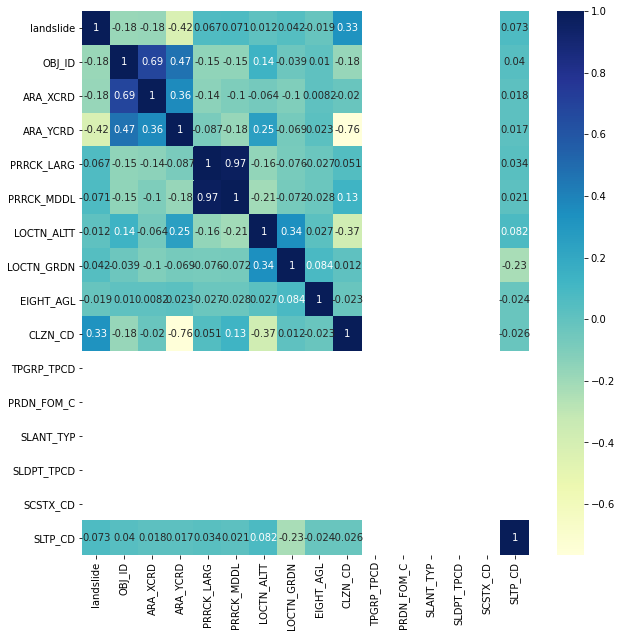

In [68]:
plt.figure(figsize = (10, 10))
corr_mat = result_g_null.corr(method='pearson')
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap='YlGnBu')

In [38]:
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
model = ols('landslide ~ OBJ_ID+ARA_XCRD+ARA_YCRD+PRRCK_LARG+PRRCK_MDDL+LOCTN_ALTT+LOCTN_GRDN+EIGHT_AGL+CLZN_CD+TPGRP_TPCD+PRDN_FOM_C+SLANT_TYP+SLDPT_TPCD+SCSTX_CD+SLTP_CD', result_g)

In [40]:
res = model.fit()

In [41]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              landslide   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     9488.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:55:10   Log-Likelihood:            -2.5698e+05
No. Observations:              439370   AIC:                         5.140e+05
Df Residuals:                  439354   BIC:                         5.142e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5823      0.010     59.093      0.000       0.563       0.602
OBJ_ID      3.395e-07   1.19e-08     28.649      0.000    3.16e-07    3.63e-07
ARA_XCRD   -1.728e-07   2.92e-08     -5.922      0.000    -2.3e-07   -1.16e-07
ARA_YCRD   -2.217e-06   2.12e-08   -104.740      0.000   -2.26e-06   -2.18e-06
PRRCK_LARG     0.4762      0.005     96.434      0.000       0.467       0.486
PRRCK_MDDL    -0.0417      0.000    -85.102      0.000      -0.043      -0.041
LOCTN_ALTT     0.0002   4.45e-06     34.286      0.000       0.000       0.000
LOCTN_GRDN     0.0015      8e-05     19.041      0.000       0.001       0.002
EIGHT_AGL   -7.32e-05   6.46e-06    -11.324      0.000   -8.59e-05   -6.05e-05
CLZN_CD        0.0761      0.001     55.789      0.000       0.073       0.079
TPGRP_TPCD     0.0265      0.000     88.637      0.000       0.026       0.027
PRDN_FOM_C    -0.0078      0.001    -10.732      0.000      -0.009      -0.006
SLANT_TYP     -0.0007      0.002     -0.351      0.726      -0.005       0.003
SLDPT_TPCD     0.0039      0.000     22.586      0.000       0.004       0.004
SCSTX_CD      -0.0021      0.001     -3.466      0.001      -0.003      -0.001
SLTP_CD       -0.0075      0.000    -62.249      0.000      -0.008      -0.007
==============================================================================
Omnibus:                   123894.329   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19850.953
Skew:                          -0.050   Prob(JB):                         0.00
Kurtosis:                       1.964   Cond. No.                     7.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
model.exog_names

['Intercept',
 'OBJ_ID',
 'ARA_XCRD',
 'ARA_YCRD',
 'PRRCK_LARG',
 'PRRCK_MDDL',
 'LOCTN_ALTT',
 'LOCTN_GRDN',
 'EIGHT_AGL',
 'CLZN_CD',
 'TPGRP_TPCD',
 'PRDN_FOM_C',
 'SLANT_TYP',
 'SLDPT_TPCD',
 'SCSTX_CD',
 'SLTP_CD']

In [44]:
variance_inflation_factor(model.exog, 1)

3.084869887702881

In [45]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,OBJ_ID,3.084870
1,ARA_XCRD,3.468243
2,ARA_YCRD,5.127742
3,PRRCK_LARG,32.269186
4,PRRCK_MDDL,32.082894
5,LOCTN_ALTT,1.846156
6,LOCTN_GRDN,1.168188
7,EIGHT_AGL,1.002125
8,CLZN_CD,3.185893
9,TPGRP_TPCD,2.364594


In [47]:
model2 = ols('landslide ~ OBJ_ID+ARA_XCRD+ARA_YCRD+PRRCK_MDDL+LOCTN_ALTT+LOCTN_GRDN+EIGHT_AGL+CLZN_CD+TPGRP_TPCD+PRDN_FOM_C+SLANT_TYP+SLDPT_TPCD+SCSTX_CD+SLTP_CD', result_g)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              landslide   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     9488.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:40:50   Log-Likelihood:            -2.5698e+05
No. Observations:              439370   AIC:                         5.140e+05
Df Residuals:                  439354   BIC:                         5.142e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5823      0.010     59.093      0.000       0.563       0.602
OBJ_ID      3.395e-07   1.19e-08     28.649      0.000    3.16e-07    3.63e-07
ARA_XCRD   -1.728e-07   2.92e-08     -5.922      0.000    -2.3e-07   -1.16e-07
ARA_YCRD   -2.217e-06   2.12e-08   -104.740      0.000   -2.26e-06   -2.18e-06
PRRCK_LARG     0.4762      0.005     96.434      0.000       0.467       0.486
PRRCK_MDDL    -0.0417      0.000    -85.102      0.000      -0.043      -0.041
LOCTN_ALTT     0.0002   4.45e-06     34.286      0.000       0.000       0.000
LOCTN_GRDN     0.0015      8e-05     19.041      0.000       0.001       0.002
EIGHT_AGL   -7.32e-05   6.46e-06    -11.324      0.000   -8.59e-05   -6.05e-05
CLZN_CD        0.0761      0.001     55.789      0.000       0.073       0.079
TPGRP_TPCD     0.0265      0.000     88.637      0.000       0.026       0.027
PRDN_FOM_C    -0.0078      0.001    -10.732      0.000      -0.009      -0.006
SLANT_TYP     -0.0007      0.002     -0.351      0.726      -0.005       0.003
SLDPT_TPCD     0.0039      0.000     22.586      0.000       0.004       0.004
SCSTX_CD      -0.0021      0.001     -3.466      0.001      -0.003      -0.001
SLTP_CD       -0.0075      0.000    -62.249      0.000      -0.008      -0.007
==============================================================================
Omnibus:                   123894.329   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19850.953
Skew:                          -0.050   Prob(JB):                         0.00
Kurtosis:                       1.964   Cond. No.                     7.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model2.exog_names

['Intercept',
 'OBJ_ID',
 'ARA_XCRD',
 'ARA_YCRD',
 'PRRCK_MDDL',
 'LOCTN_ALTT',
 'LOCTN_GRDN',
 'EIGHT_AGL',
 'CLZN_CD',
 'TPGRP_TPCD',
 'PRDN_FOM_C',
 'SLANT_TYP',
 'SLDPT_TPCD',
 'SCSTX_CD',
 'SLTP_CD']

In [51]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model2.exog, i)} 
             for i, column in enumerate(model2.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,OBJ_ID,3.084445
1,ARA_XCRD,3.205596
2,ARA_YCRD,4.749755
3,PRRCK_MDDL,1.114780
4,LOCTN_ALTT,1.843021
5,LOCTN_GRDN,1.167845
6,EIGHT_AGL,1.002124
7,CLZN_CD,3.178079
8,TPGRP_TPCD,2.361814
9,PRDN_FOM_C,3.538396
